In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
all_data = pd.read_csv("resnet20_cifar10.csv")
all_data.head()

,run,operation,started,time,status,label,blocker,data_location,dataset,gpu,...,Sparsity,alignment_score,best_post_acc,best_post_loss,best_pre_acc,best_pre_loss,immediate_post_acc,immediate_post_loss,Accuracy/preprune,Loss/preprune
0,71ce8c3c,main.py,2022-07-04 00:10:17,0:00:23,error,resnet20_cifar10_2,none,~/torch_subspace/data/,cifar10,cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5066f4df,main.py,2022-07-04 00:10:08,0:00:23,error,resnet20_cifar10_2,none,~/torch_subspace/data/,cifar10,cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2085471,main.py,2022-07-04 00:10:02,0:00:22,error,resnet20_cifar10_2,none,~/torch_subspace/data/,cifar10,cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8662b8d4,main.py,2022-07-04 00:09:54,0:00:22,error,resnet20_cifar10_2,none,~/torch_subspace/data/,cifar10,cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0fbbf2bf,main.py,2022-07-04 00:09:45,0:00:22,error,resnet20_cifar10_2,none,~/torch_subspace/data/,cifar10,cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
all_data = all_data[["blocker", "pruner", "best_pre_acc", "best_post_acc", "Sparsity", "immediate_post_acc"]]
all_data["acc_drop"] = all_data["best_pre_acc"] - all_data["best_post_acc"]
all_data.head()

,blocker,pruner,best_pre_acc,best_post_acc,Sparsity,immediate_post_acc,acc_drop
0,none,alignment_variance_2,NaN,NaN,NaN,NaN,NaN
1,none,alignment_variance_2,NaN,NaN,NaN,NaN,NaN
2,none,alignment_variance_2,NaN,NaN,NaN,NaN,NaN
3,none,alignment_variance_2,NaN,NaN,NaN,NaN,NaN
4,none,alignment_variance_2,NaN,NaN,NaN,NaN,NaN


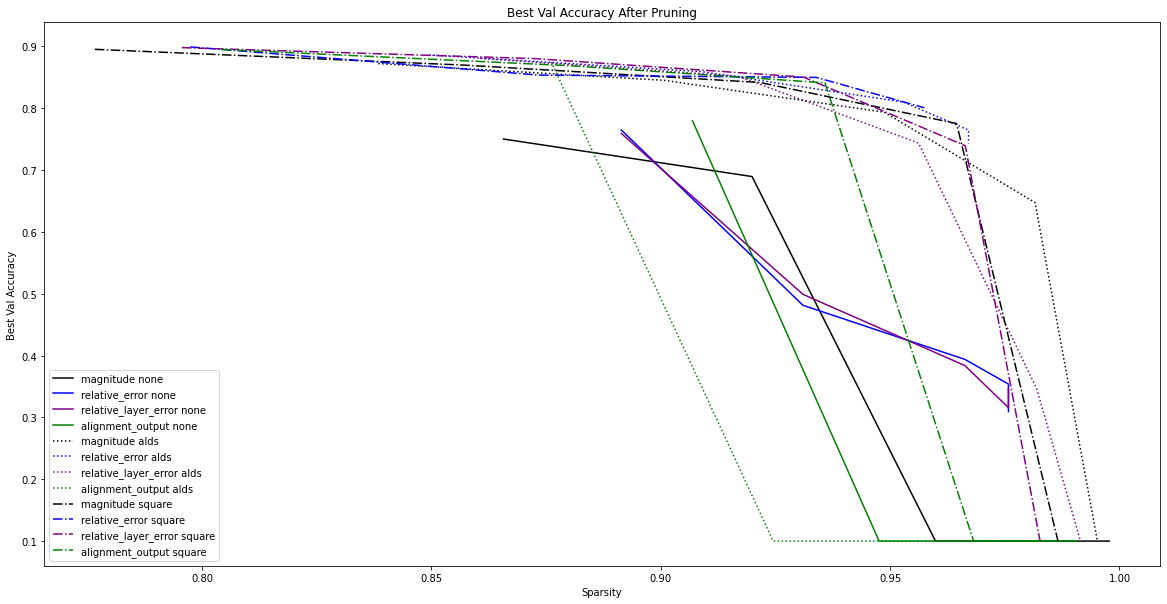

In [6]:
data = all_data[
    (all_data["pruner"] != "alignment_output_sampling_proportional") &
    (all_data["pruner"] != "alignment_output_sampling") &
    (all_data["pruner"] != "alignment_variance") &
    (all_data["pruner"] != "alignment_variance_2")
]
plt.figure(figsize=(20, 10))
blocker_styles = {
    "none": "-",
    "alds": ":",
    "true_alds": "--",
    "square": "-.",
}
pruner_colors = {
    "magnitude": "black",
    "relative_error": "blue",
    "relative_layer_error": "purple",
    "alignment_output": "green",
    "alignment_variance": "purple",
    "alignment_output_sampling": "red",
    # "alignment_output_sampling_proportional": "black"
}
for blocker in data["blocker"].unique():
    b = data[data["blocker"] == blocker]
    for pruner in b["pruner"].unique():
        p = b[b["pruner"] == pruner].sort_values(by="Sparsity")
        color = "red" if blocker == "true_alds" else pruner_colors[pruner]
        plt.plot(
            p["Sparsity"],
            p["best_post_acc"],
            label=f"{pruner} {blocker}",
            linestyle=blocker_styles[blocker],
            color=color
        )
plt.legend()
plt.xlabel("Sparsity")
plt.ylabel("Best Val Accuracy")
# plt.ylim(0.8, 0.95)
# plt.xlim(0.95, 0.995)
plt.title("Best Val Accuracy After Pruning")
plt.show()
